In [1]:
import pandas as pd
import numpy as np

In [3]:
raw_data = pd.read_csv('./data/0000.perovskitedata.csv', skiprows=4, low_memory=False)
runs = [
'2020-06-22T17_03_40.423248+00_00_HC',
'2020-06-22T14_21_59.590476+00_00_HC',
'2020-11-25T22_28_56.039621+00_00_HC',
'2020-06-26T13_48_04.144007+00_00_HC',
'2020-06-26T15_05_30.850680+00_00_HC',
'2020-11-30T18_12_22.108199+00_00_HC',
'2020-07-06T15_27_13.995342+00_00_HC',
'2020-11-25T23_09_35.145018+00_00_HC',
'2020-07-08T14_08_51.487577+00_00_HC',
'2020-07-06T16_12_50.344926+00_00_HC',
]
expression = '|'.join(runs)
expression = expression.replace('.', '\.')
expression = expression.replace('+', '\+')
dataset = raw_data[raw_data['name'].str.contains(expression, regex=True)]
dataset_num = dataset.select_dtypes(include='number')
dataset_num = dataset_num.dropna(axis=1)
dataset_num = dataset_num.loc[:,dataset_num.std() > 0.0]
len(dataset_num.columns)

In [8]:
mansoor_data = pd.read_csv('./data/training_set_redone_mansoor.csv')
mansoor_data = mansoor_data.select_dtypes(include='number')
dataset_num = mansoor_data
score_col = '_out_crystalscore'
columns_to_exclude = ['dataset', score_col, '_rxn_temperatureC_actual_bulk']

In [14]:
rapid1_features = ['_rxn_M_inorganic', '_rxn_M_organic', '_rxn_M_acid', '_rxn_temperatureC', 
                     '_rxn_mixingtime1S', '_rxn_mixingtime2S', '_rxn_reactiontimeS', '_rxn_stirrateRPM',
                     '_feat_AtomCount_C', '_feat_AtomCount_N',
                     '_feat_AvgPol','_feat_MolPol','_feat_Refractivity',
                     '_feat_AliphaticRingCount',
                     '_feat_AromaticRingCount','_feat_AliphaticAtomCount','_feat_AromaticAtomCount',
                     '_feat_BondCount', '_feat_CarboaliphaticRingCount', '_feat_CarboaromaticRingCount',
                     '_feat_CarboRingCount', '_feat_ChainAtomCount', '_feat_ChiralCenterCount', '_feat_RingAtomCount', '_feat_SmallestRingSize',                                  '_feat_LargestRingSize','_feat_fsp3', '_feat_HeteroaliphaticRingCount', '_feat_HeteroaromaticRingCount',
                     '_feat_RotatableBondCount', '_feat_BalabanIndex', '_feat_CyclomaticNumber','_feat_HyperWienerIndex',
                     '_feat_WienerIndex', '_feat_WienerPolarity', '_feat_MinimalProjectionArea', '_feat_MinimalProjectionRadius',
                     '_feat_MaximalProjectionRadius', '_feat_LengthPerpendicularToTheMinA', '_feat_LengthPerpendicularToTheMaxA',
                     '_feat_VanderWaalsVolume', '_feat_VanderWaalsSurfaceArea', '_feat_ASA', '_feat_ASA+', '_feat_ASA-',
                     '_feat_ASA_H', '_feat_ASA_P', '_feat_PolarSurfaceArea', '_feat_acceptorcount', '_feat_Accsitecount',
                     '_feat_donorcount', '_feat_donsitecount', '_feat_sol', 
                     '_feat_fr_NH2', '_feat_fr_NH1', '_feat_fr_NH0', '_feat_fr_quatN', '_feat_fr_ArN', '_feat_fr_Ar_NH', '_feat_fr_Imine',          
                     '_feat_fr_amidine', '_feat_fr_dihydropyridine', '_feat_fr_guanido', '_feat_fr_piperdine', '_feat_fr_piperzine', '_feat_fr_pyridine'
]
rapid1_not_present = ['_feat_Mass', '_feat_Mass_Nosalt', '_feat_isoelectric', '_feat_apKa1', 
                      '_feat_apKa2','_feat_bpKa1', '_feat_bpKa2','_feat_bpKa3','_feat_bpKa4',]

current_feature_names = ['_rxn_M_inorganic', '_rxn_M_organic', '_rxn_M_acid', '_rxn_temperatureC_actual_bulk', '_rxn_mixingtime1_s', '_rxn_mixingtime2_s', '_rxn_reactiontime_s', '_rxn_stirrate_rpm',
'_feat_organic_0_accsitecount_std', 
'_feat_organic_0_aliphaticatomcount_std',
'_feat_organic_0_aliphaticringcount_std', 
'_feat_organic_0_aromaticatomcount_std',
'_feat_organic_0_aromaticringcount_std',
'_feat_organic_0_asa+_std', '_feat_organic_0_asa-_std', '_feat_organic_0_asa_std', '_feat_organic_0_atomcount_c_std',
'_feat_organic_0_atomcount_n_std', '_feat_organic_0_avgpol_std', 
'_feat_organic_0_bondcount_std', '_feat_organic_0_carboaliphaticringcount_std', '_feat_organic_0_carboaromaticringcount_std',                 '_feat_organic_0_carboringcount_std', '_feat_organic_0_chainatomcount_std', '_feat_organic_0_cyclomaticnumber_std',
'_feat_organic_0_donsitecount_std', '_feat_organic_0_heteroaliphaticringcount_std', 
'_feat_organic_0_largestringsize_std', '_feat_organic_0_maximalprojectionradius_std', '_feat_organic_0_minimalprojectionarea_std',
'_feat_organic_0_minimalprojectionradius_std', '_feat_organic_0_molpol_std', '_feat_organic_0_refractivity_std',
'_feat_organic_0_ringatomcount_std', '_feat_organic_0_rotatablebondcount_std', '_feat_organic_0_smallestringsize_std',
'_feat_organic_0_vanderwaalsvolume_std', 
'_feat_organic_0_fr_amidine', '_feat_organic_0_fr_nh1', '_feat_organic_0_fr_nh2', '_feat_organic_0_fr_quatn', '0D','1D','2D','3D','inorganic_connectivity','dD (MPa_)','dP (MPa_)','dH (MPa_)']

full_descriptions = ['Inorganic Molarity', 'Organic Molarity', 'Formic Acid Molarity', 'Plate Temperature', 'Mixing Time 1', 'Mixing Time 2', 'Reaction Time',
'Stir Rate', 'H-bond acceptor atom count', 'No. of Aliphatic atoms', 'No. of Aliphatic rings', 'No. of Aromatic atoms', 'No. of Aromatic rings', 'Water Accessible Surface Area with +ve partial charge', 'Water Accessible Surface Area with -ve partial charge', 'Water Accessible Surface Area', 'No. of Carbon atoms', 'No. of Nitrogen atoms', 'Avg. molecular polarizability', 'Number of bonds', 'No. of Carbon aliphatic rings', 'No. of Carbon aromatic rings', 'No. of Carbon rings', 'No. of atoms in chain', 'Cyclomatic number of molecular graph', 'Hydrogen bond donor multiplicity', 'No. of heteroaliphatic rings', 'No. of members in the largest ring', 'Maximal projection radius', 'Minimal projection area', 'Minimal projection radius', 'Molecular polarizability', 'Refractivity',
'No. of atoms in a ring', 'No. of rotatable bonds', 'No. of members in the smallest ring', 'van der Waals volume',  'No. of amidine groups', 'No. of secondary amines', 'No. of primary amines', 'No. of quaternary amines', '0D','1D','2D','3D','inorganic_connectivity','dD (MPa_)','dP (MPa_)','dH (MPa_)']
renamed_cols = dict(zip(current_feature_names, full_descriptions))

In [15]:
training_cols = current_feature_names
x_dataset = dataset_num[set(dataset_num.columns).intersection(training_cols)]
Y_dataset = dataset_num['_out_crystalscore'].values
Y_data = Y_dataset > 2
Y_data = Y_data.astype(int)
print(Y_data)
Y_dataset

[1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 1 1 1 1 0 0 0 0]


array([4, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1,
       4, 4, 1, 3, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 4, 3, 4, 4, 1, 1,
       1, 1])

In [7]:
def modify_features():
    dataset_cols = set(dataset_num.columns)
    modified_features = []
    for feature in rapid1_features:
        mod_feat = feature.lower().split('_')
        if mod_feat[1] == 'feat':
            mod_feat = ['feat', 'organic', '0'] + mod_feat[2:] + ['std']
            mod_feat = '_'.join(mod_feat)
            modified_features.append('_'+mod_feat)
    set(modified_features).intersection(dataset_cols)

In [16]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_dataset, Y_data)

DecisionTreeClassifier(random_state=0)

<class 'list'>


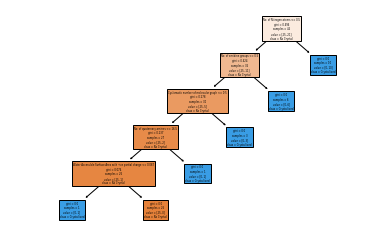

In [17]:
plot = plot_tree(dt, feature_names=full_descriptions, filled=True, class_names=['No Crystal', 'Crystallized'], )
print(type(plot))

In [11]:
x_dataset.to_csv('training_set.csv')

In [14]:
mansoor_cols = ['name'] + list(x_dataset.columns) + ['_out_crystalscore']
dataset[mansoor_cols].to_csv('training_set.csv')

In [6]:
import pandas as pd
from pathlib import Path
path = './data/csv_for_notebook/MA_333_1.csv'

csv_path = Path('./data/csv_for_notebook')
for path in csv_path.glob('*.csv'):
    df = pd.read_csv(path)
    sol_ht_cols = ['Time for Height Build Up (hours)','AS Height Experimental (cm)','Solvent Height Experimental (cm)','Crystallization Time (hours)','Crystallization Height (cm)']
    conc_cols = ['Time for Concentration (hours)','FAH [M]','Inorganic [M]','Organic [M]','Solvent [M]','DCM [M]']
    sol_df = df[sol_ht_cols].dropna(how='all')
    conc_df = df[conc_cols].dropna(how='all')
    sol_df.to_csv(path.parents[0] / f'{path.stem}_solvent_height.csv')
    conc_df.to_csv(path.parents[0] / f'{path.stem}_concentrations.csv')
